#Text classification - IMDB Dataset

In [1]:
!pip install transformers[sentencepiece] datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 27.6 MB/s 
     |████████████████████████████████| 365 kB 57.8 MB/s 
     |████████████████████████████████| 212 kB 69.3 MB/s 
     |████████████████████████████████| 120 kB 58.5 MB/s 
     |████████████████████████████████| 115 kB 64.2 MB/s 
     |████████████████████████████████| 127 kB 48.7 MB/s 
     |████████████████████████████████| 6.6 MB 44.2 MB/s 
     |████████████████████████████████| 1.3 MB 57.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


## Datasets library

List the dataset currently available on the Hugging face hub

In [2]:
from datasets import list_datasets
list_datasets()

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'blbooks',
 'blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bnl_newspapers',
 'bookcorpus',
 'bookcorpusopen'

Load IMDB dataset

In [3]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [4]:
imdb['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [5]:
imdb['test'][:3]

{'text': ['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as

reduce train dataset

In [7]:
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

- 1600 = training dataset
- 400 = validation dataset

In [8]:
imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [9]:
imdb_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [11]:
#rename

imdb_train_validation['validation'] = imdb_train_validation.pop('test')
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

update dataset

In [12]:
imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

reduce test set

In [13]:
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [14]:
imdb['unsupervised'][:3]

{'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is not to be taken lightly

delete unsupervised

In [16]:
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## Overview of IMDB Dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [18]:
imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,"""Gespenster"" Question of to be cool in the German cinema<br /><br />There are not many German films in the last ten years, who have made me so interest. Yes, the problem of the most German films are in this film ""Gespenster"" too. He is on some pl...",1
1284,Based on the average short story by horror writer Stephen King about so called 'Sleepwalkers' ancient and immortal cat-like creatures that suck the life out of virgins in order that this energy may sustain them They have supernatural abilities- t...,0
408,"I hadn't heard about Brashear before I watched this. This is the story of him and the man who trained him, helping him to become the first African-American US Navy Diver. A tale of will-power. The plot is well-written, and develops nicely through...",1
1282,This movie probably would only get a 7 or 8 from me to tell the truth if I had seen trailers or had any kind of knowledge of what the film is all about. Since it was virtually all a surprise it was almost a perfect piece of edgy entertainment tha...,1
1447,"I love this movie. It's wacky, funny, violent, surreal, played out in a madman's head, and definitely not your usual comedy. <br /><br />If you don't find the film amusing then I guess it's just not for your tastes, so this is a tough one to writ...",1
1144,"After a slow beginning, BRUCE ALMIGHTY is a very funny film that had something positive to say. It wasn't one of Jim Carrey's best performances, but he was still OK. Morgan Freeman was just right as God. Jennifer Aniston had some good moments. I ...",1
1381,"Convoluted, infuriating and implausible, Fay Grim is hard to sit through but Parker Posey is really the only actress who could take this story and run with it. She's at once touching,funny, cunning. The supporting actors commit to it as well.<br ...",1
181,"Twisted Desire (1996) was a TV movie starring Melissa Joan Hart. Melissa's character, Jennifer Stanton, a seventeen-year-old seduces her current boyfriend Nick Ryan into murdering her two parents. The movie is based on the 1990 murders of the par...",1
1183,"The first time my best friend and I sat down to watch this movie, we were watching it for Alex Winter of ""Bill & Ted's"" fame. We didn't know what to expect other than who and what it was about.<br /><br />By the time the movie was over, we knew t...",1
1103,"Wow! So much fun! Probably a bit much for normal American kids, and really it's a stretch to call this a kid's film, this movie reminded me a quite a bit of Time Bandits - very Terry Gilliam all the way through. While the overall narrative is pre...",1


In [19]:
df.loc[0, 'text']

"TV pilots, don't you love them? Quinn Martin tried this one out after being successful in a bunch of other TV detective movies, but this one goes nowhere except in the realm of MST where it belongs. Roy Thinnes is Diamond Head who takes orders from Aunt Mary to find super spy Lovejoy, I mean Tree. Zulu and Tso-Tsing are there for ethnic comic relief and not much else. Tree sucks as a bad guy despite all his disguises that makes him look exactly the same as he normally does. There's more unnatural clothing fiber here than you can ever imagine (required in the 1970's)and the show itself is so anti-climatic. Why did it not go to series? You figure it out, it's quite blatant. Again it's fun for MST, but not a lot else!!"

In [20]:
# simple regex

df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

"TV pilots, don't you love them? Quinn Martin tried this one out after being successful in a bunch of other TV detective movies, but this one goes nowhere except in the realm of MST where it belongs. Roy Thinnes is Diamond Head who takes orders from Aunt Mary to find super spy Lovejoy, I mean Tree. Zulu and Tso-Tsing are there for ethnic comic relief and not much else. Tree sucks as a bad guy despite all his disguises that makes him look exactly the same as he normally does. There's more unnatural clothing fiber here than you can ever imagine (required in the 1970's)and the show itself is so anti-climatic. Why did it not go to series? You figure it out, it's quite blatant. Again it's fun for MST, but not a lot else!!"

In [21]:
df.label.value_counts()

0    800
1    800
Name: label, dtype: int64

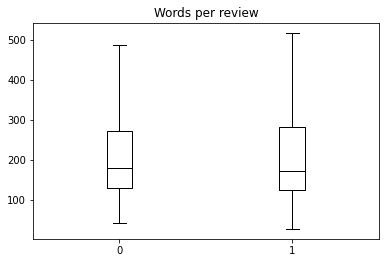

In [22]:
df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review",
           by="label",
           grid=False,
           showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

similiar distribution

In [23]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]

,text,label,Words per review
47,"My favorite part of this film was the old man's attempt to cure his neighbor's ills by putting the strong medicine in his bath. There is more than a sense of family, there is a sense of community.",1,38
169,One of my favorite scenes is at the beginning when guests on a private yacht decide to take an impromptu swim - in their underwear! Rather risqué for 1931!,1,29
307,"Brilliant execution in displaying once and for all, this time in the venue of politics, of how ""good intentions do actually pave the road to hell"". Excellent!",1,27
393,"This is actually one of my favorite films, I would recommend that EVERYONE watches it. There is some great acting in it and it shows that not all ""good"" films are American....",1,32
1204,"""Foxes"" is a great film. The four young actresses Jodie Foster, Cherie Currie, Marilyn Kagan and Kandice Stroh are wonderful. The song ""On the radio"" by Donna Summer is lovely. A great film. *****",1,34


In [25]:
imdb.reset_format()

## Tokenizer

In [27]:
from transformers import AutoTokenizer

checkpoint = 'distilbert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
  return tokenizer(batch['text'],
                   padding = True,
                   truncation = True)
  
imdb_encoded = imdb.map(tokenize_function,
                        batched=True,
                        batch_size=None)

imdb_encoded

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [28]:
print(imdb_encoded['train'][0])

{'text': "TV pilots, don't you love them? Quinn Martin tried this one out after being successful in a bunch of other TV detective movies, but this one goes nowhere except in the realm of MST where it belongs. Roy Thinnes is Diamond Head who takes orders from Aunt Mary to find super spy Lovejoy, I mean Tree. Zulu and Tso-Tsing are there for ethnic comic relief and not much else. Tree sucks as a bad guy despite all his disguises that makes him look exactly the same as he normally does. There's more unnatural clothing fiber here than you can ever imagine (required in the 1970's)and the show itself is so anti-climatic. Why did it not go to series? You figure it out, it's quite blatant. Again it's fun for MST, but not a lot else!!", 'label': 0, 'input_ids': [101, 1794, 8486, 117, 1274, 112, 189, 1128, 1567, 1172, 136, 8447, 2405, 1793, 1142, 1141, 1149, 1170, 1217, 2265, 1107, 170, 9670, 1104, 1168, 1794, 9140, 5558, 117, 1133, 1142, 1141, 2947, 8251, 2589, 1107, 1103, 9695, 1104, 10978, 19

## Tiny IMDB

In [29]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel',x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForInstanceSegmentation',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTokenClassification',
 'AutoModelForVision2Seq',
 'AutoModelForVisualQuestionAnswering',
 'AutoModelWithLMHead']

In [31]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification.
         from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bia

In [32]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function,
                                  batched=True,
                                  batch_size=None)
tiny_imdb_encoded

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [33]:
from transformers import Trainer, TrainingArguments
batch_size = 8 
logging_steps = len(tiny_imdb_encoded['train']) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"

training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
include_inputs_for_metrics=False,
jit_mode_eval=False,
label_names=None,
label_s

Start training our model:

In [34]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model = model,
                  args = training_args,
                  train_dataset = tiny_imdb_encoded['train'],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.709900,0.696822
2,0.675300,0.689872


TrainOutput(global_step=14, training_loss=0.6922041688646589, metrics={'train_runtime': 8.5372, 'train_samples_per_second': 11.713, 'train_steps_per_second': 1.64, 'total_flos': 13246739865600.0, 'train_loss': 0.6922041688646589, 'epoch': 2.0})

In [35]:
preds = trainer.predict(tiny_imdb_encoded['test'])

In [36]:
preds

PredictionOutput(predictions=array([[0.05736549, 0.10234916],
       [0.06621511, 0.12081715],
       [0.0653093 , 0.099323  ],
       [0.06404568, 0.09998963],
       [0.05270205, 0.12398528],
       [0.07684382, 0.11570629],
       [0.0752117 , 0.08539167],
       [0.07344753, 0.10074386],
       [0.07950842, 0.09904819],
       [0.06182526, 0.12128676]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0]), metrics={'test_loss': 0.7042409181594849, 'test_runtime': 0.2417, 'test_samples_per_second': 41.374, 'test_steps_per_second': 8.275})

In [37]:
preds.predictions.shape

(10, 2)

In [38]:
preds.predictions.argmax(axis=-1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
preds.label_ids

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.3

In [41]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}

In [43]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  compute_metrics=get_accuracy,
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.672400,0.681378,0.500000
2,0.635600,0.666795,0.700000


## Training run

full training run

In [44]:
batch_size = 16
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [45]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=get_accuracy,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.459800,0.289214,0.892500
2,0.244700,0.303112,0.882500


In [46]:
trainer.evaluate()

{'eval_loss': 0.3031123876571655,
 'eval_accuracy': 0.8825,
 'eval_runtime': 7.7493,
 'eval_samples_per_second': 51.617,
 'eval_steps_per_second': 3.226,
 'epoch': 2.0}

In [47]:
trainer.save_model()

In [48]:
model_name

'distilbert-base-cased-finetuned-imdb'

In [49]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('This is not my idea of fun')

[{'label': 'LABEL_0', 'score': 0.6342781186103821}]

In [50]:
classifier('This was beyond incredible')

[{'label': 'LABEL_1', 'score': 0.750529408454895}]